# Pymaceuticals Inc

your analysis here....

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = r"C:\Users\genna\Desktop\module-5-challenge\Starter_Code (2)\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"C:\Users\genna\Desktop\module-5-challenge\Starter_Code (2)\Starter_Code\Pymaceuticals\data\Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_data_merge = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

mouse_data_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [17]:
mouse_count = mouse_data_merge["Mouse ID"].nunique()
mouse_count

249

In [18]:
duplicate_id = mouse_data_merge.loc[mouse_data_merge.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [19]:
duplicate_mouse = mouse_data_merge.loc[mouse_data_merge["Mouse ID"]=="g989"]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [20]:
new_mouse_data = mouse_data_merge[mouse_data_merge["Mouse ID"].isin(duplicate_id)==False]
new_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [21]:
mouse_count_new = new_mouse_data["Mouse ID"].nunique()
mouse_count_new

248

# Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = new_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = new_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var = new_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = new_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = new_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_data = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                          "Median Tumor Volume": tumor_median,
                        "Tumor Volume Variance": tumor_var,
                          "Tumor Standard Deviation": tumor_std,
                          "Tumor Volume Std. Err.": tumor_sem})
tumor_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Standard Deviation,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
sstable = new_mouse_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
# Using the aggregation method, produce the same summary statistics in a single line
sstable

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

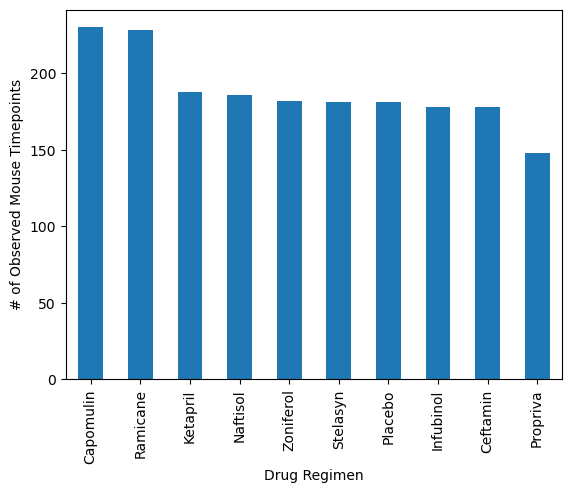

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count = new_mouse_data["Drug Regimen"].value_counts()
count.plot(kind="bar", xlabel="Drug Regimen", rot=90, ylabel="# of Observed Mouse Timepoints")

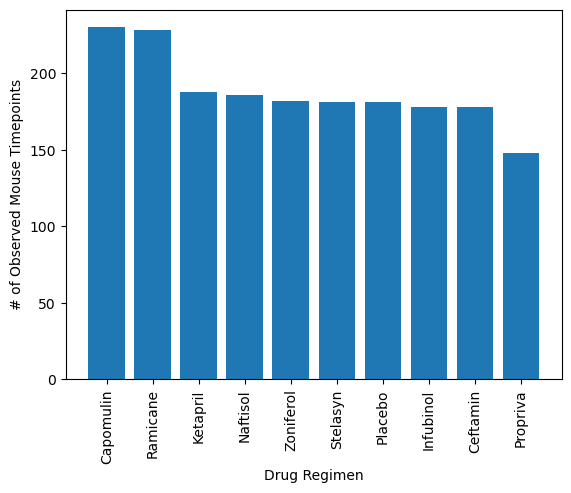

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
countpy = new_mouse_data["Drug Regimen"].value_counts()
plt.bar(countpy.index.values, countpy.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

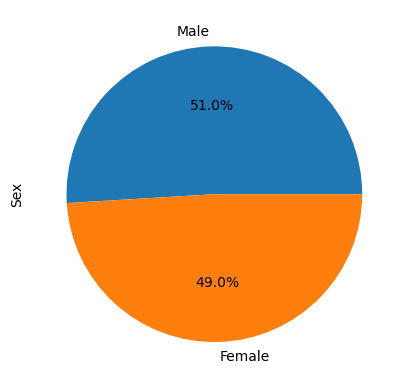

In [46]:
distpd = new_mouse_data["Sex"].value_counts()
# distpd.plot(kind = "pie")
# plt.ylabel("Sex")
distpd.plot.pie(y='sizes', autopct='%1.1f%%', ylabel = "Sex")

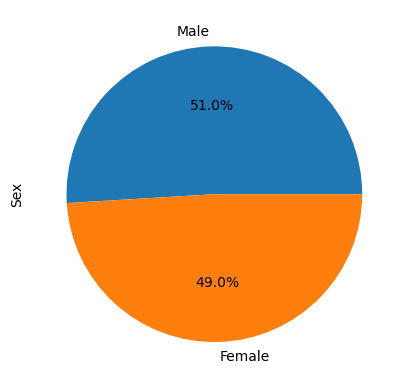

In [54]:
distpd = new_mouse_data["Sex"].value_counts()
plt.pie(distpd.values, labels=distpd.index, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

# Quartiles, Outliers, and Boxplots

In [108]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# cap = new_mouse_data.loc[(new_mouse_data["Drug Regimen"] == "Capomulin") & (new_mouse_data["Timepoint"] == 45)]
# ram = new_mouse_data.loc[(new_mouse_data["Drug Regimen"] == "Ramicane") & (new_mouse_data["Timepoint"] == 45)]
# inf = new_mouse_data.loc[(new_mouse_data["Drug Regimen"] == "Infubinol") & (new_mouse_data["Timepoint"] == 45)]
# cef = new_mouse_data.loc[(new_mouse_data["Drug Regimen"] == "Ceftamin") & (new_mouse_data["Timepoint"] == 45)]

tumor_vol = new_mouse_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_merge = pd.merge(tumor_vol, new_mouse_data, how="left", on=["Mouse ID"])
# tumor_vol_merge = tumor_vol_merge["Timepoint_x" == "Timepoint_y"]

tumor_vol_merge2 = tumor_vol_merge[tumor_vol_merge["Timepoint_x"] == tumor_vol_merge["Timepoint_y"]]
tumor_vol_merge2.reset_index(inplace = True)
tumor_vol_merge2

,index,Mouse ID,Timepoint_x,Timepoint_y,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,9,a203,45,45,67.973419,2,Infubinol,Female,20,23
1,19,a251,45,45,65.525743,1,Infubinol,Female,21,25
2,29,a262,45,45,70.717621,4,Placebo,Female,17,29
3,39,a275,45,45,62.999356,3,Ceftamin,Female,20,28
4,46,a366,30,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...,...,...
243,1839,z435,10,10,48.710661,0,Propriva,Female,12,26
244,1849,z578,45,45,30.638696,0,Ramicane,Male,11,16
245,1859,z581,45,45,62.754451,3,Infubinol,Female,24,25
246,1869,z795,45,45,65.741070,3,Naftisol,Female,13,29


In [101]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
# Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = tumor_vol_merge2.loc[tumor_vol_merge2["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    # add subset
    tumor_vol_data.append(tumor_volumes)
# Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    # Determine potential outliers
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    # Print the results
    print(f"Potential outliers for {treatment}: {outliers}")

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

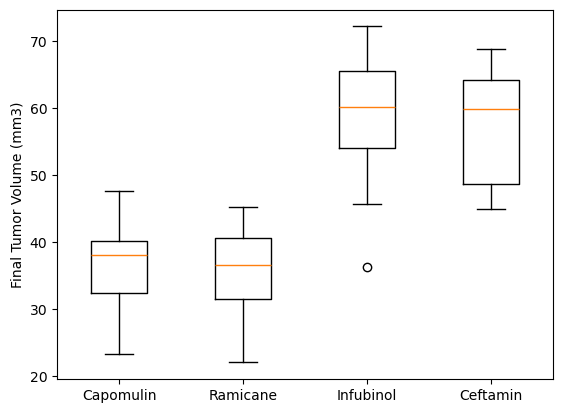

In [104]:
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data)
ax.set_xticklabels(treatments)
plt.ylabel("Final Tumor Volume (mm3)")

# Lines and Scatter Plots

In [112]:
single_mouse = tumor_vol_merge[tumor_vol_merge["Drug Regimen"] == "Capomulin"]
single_mouse

,Mouse ID,Timepoint_x,Timepoint_y,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
174,b128,45,0,45.000000,0,Capomulin,Female,9,22
175,b128,45,5,45.651331,0,Capomulin,Female,9,22
176,b128,45,10,43.270852,0,Capomulin,Female,9,22
177,b128,45,15,43.784893,0,Capomulin,Female,9,22
178,b128,45,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...,...
1818,y793,45,25,38.992734,2,Capomulin,Male,17,17
1819,y793,45,30,35.726023,2,Capomulin,Male,17,17
1820,y793,45,35,36.327870,2,Capomulin,Male,17,17
1821,y793,45,40,31.475411,2,Capomulin,Male,17,17


In [147]:
single_mouse["Weight (g)"].nunique()

9

In [127]:
single_mouse_data = tumor_vol_merge[tumor_vol_merge["Mouse ID"] == "y793"]
single_mouse_data
#l509 until it looks the same, then new mouse id will be y793

,Mouse ID,Timepoint_x,Timepoint_y,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1813,y793,45,0,45.000000,0,Capomulin,Male,17,17
1814,y793,45,5,41.019913,0,Capomulin,Male,17,17
1815,y793,45,10,41.630010,1,Capomulin,Male,17,17
1816,y793,45,15,42.283665,1,Capomulin,Male,17,17
1817,y793,45,20,40.716428,2,Capomulin,Male,17,17
1818,y793,45,25,38.992734,2,Capomulin,Male,17,17
1819,y793,45,30,35.726023,2,Capomulin,Male,17,17
1820,y793,45,35,36.327870,2,Capomulin,Male,17,17
1821,y793,45,40,31.475411,2,Capomulin,Male,17,17
1822,y793,45,45,31.896238,2,Capomulin,Male,17,17


Text(0.5, 1.0, 'Capomulin Treatment of Mouse y793')

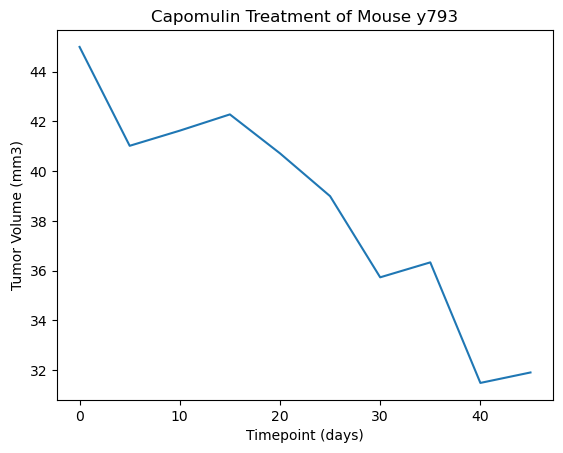

In [129]:
plt.plot(single_mouse_data["Timepoint_y"], single_mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse y793")

Please note that this line graph is NOT meant to reflect the data in the example line plot of the startercode notebook. Since the instructions did
not say that we had to plot the data of the same mouse used in the example, I decided to choose a different one to measure.

In [143]:
# scatter_plot_data = single_mouse.groupby("Weight (g)")
# scatter_plot_data

# Group the data by "Weight (g)" and calculate the average tumor volume for each weight group
scatter_plot_data = single_mouse.groupby("Weight (g)")["Tumor Volume (mm3)"].mean().reset_index()

# Now scatter_plot_data will contain the average tumor volume for each weight group
print(scatter_plot_data)


   Weight (g)  Tumor Volume (mm3)
0          15           36.182040
1          17           37.214133
2          19           41.182391
3          20           39.141053
4          21           42.088700
5          22           43.288490
6          23           43.341051
7          24           44.805810
8          25           44.062109


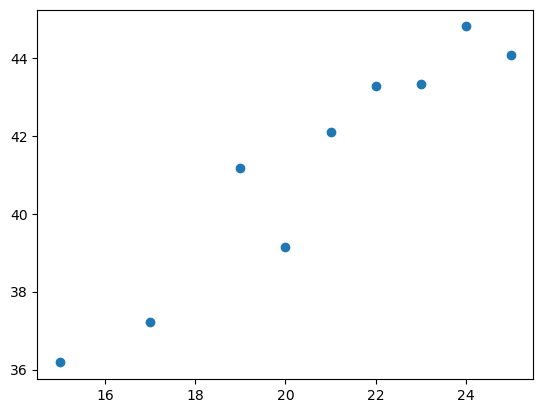

In [146]:
plt.scatter(scatter_plot_data["Weight (g)"], scatter_plot_data["Tumor Volume (mm3)"])